<a href="https://colab.research.google.com/github/marciamelo/Bootcamp_DIO_Cloud_Data_Engineer/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importa as bibliotecas e seleciona o estilo dos gráficos
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#Faz upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
#Cria o dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
df.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
311,2009-04-10,2009-04-14,307,384,19120,200904103CS710,348.58,758.0,11,1667.6,6670.4,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
804,2008-11-26,2008-11-30,199,384,18890,200811263CS797,348.58,758.0,6,909.6,3638.4,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
487,2009-12-02,2009-12-09,199,1155,19023,200912024CS938,324.69,980.0,22,4312.0,17248.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
146,2009-06-16,2009-06-25,199,366,18955,200906163CS866,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black
301,2008-02-12,2008-02-20,307,384,19094,200802123CS549,348.58,758.0,15,2274.0,9096.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
175,2009-10-13,2009-10-24,307,1203,19137,200910134CS727,324.69,980.0,12,0.0,11760.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
521,2008-12-25,2008-12-29,306,1226,19060,200812254CS676,330.99,999.0,10,1998.0,7992.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
71,2008-10-10,2008-10-20,307,1203,19106,200810104CS637,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
196,2008-06-26,2008-07-09,199,1226,18849,200806264CS625,330.99,999.0,12,0.0,11988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
190,2008-10-20,2008-10-31,307,1155,19107,200810204CS646,324.69,980.0,12,0.0,11760.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [7]:
#Faz a contagem de linhas e colunas do df
df.shape

(904, 16)

In [9]:
#Exibe os tipos de dados das colunas do df
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
#Calcula a receita total
df['Valor Venda'].sum()

5984606.1426

In [12]:
#Cria a coluna com o custo total
df['Custo TT'] = df['Custo Unitário'].mul(df['Quantidade'])

In [13]:
#Exibe os 5 primeiros registros
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo TT
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [15]:
#Exibe o custo total
round(df['Custo TT'].sum(), 2)

2486783.05

In [16]:
#Cria a coluna com o lucro
df['Lucro'] = df['Valor Venda'] - df['Custo TT']

In [17]:
#Exibe os 5 primeiros registros
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo TT,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [18]:
#Exibe o lucro total
round(df['Lucro'].sum(), 2)

3497823.09

In [19]:
#Calcula o tempo de envio dos produtos
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [20]:
#Exibe os 5 primeiros registros
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo TT,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days


In [23]:
#Exipe o tipo do dado
df['Tempo Envio'].dtypes

dtype('<m8[ns]')

In [24]:
#Converte a coluna 'Tempo Envio' para int
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [25]:
#Exipe o tipo do dado
df['Tempo Envio'].dtypes

dtype('int64')

In [29]:
#Calcula a média do tempo de envio por marca
round(df.groupby('Marca')['Tempo Envio'].mean(), 2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo Envio, dtype: float64

**Missing Values**

In [31]:
#Verifica se há campos em branco ou nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo TT          0
Lucro             0
Tempo Envio       0
dtype: int64

**Lucro por ano e marca**

In [43]:
#Realizando a soma por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [41]:
#Configura o formato de exibição dos valores
pd.options.display.float_format = '{:20,.2f}'.format

In [45]:
#Reseta o index e atribui o resultado a variavel 'lucro_ano'
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [50]:
#Exibe o total de produtos vendidos ordenando pela quantidade de forma ascendente
df.groupby(['Produto'])['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

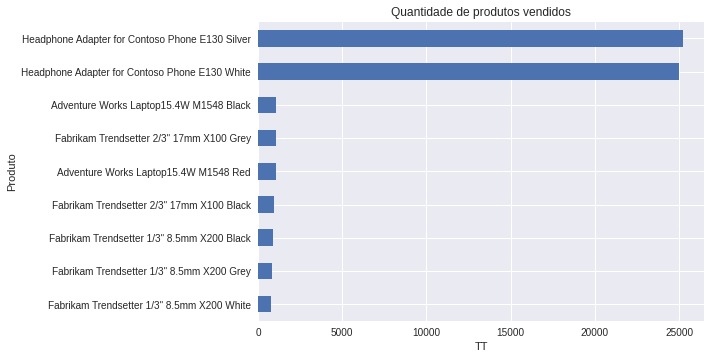

In [67]:
#Grafico com o total de produtos vendidos
df.groupby(['Produto'])['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Quantidade de produtos vendidos')
plt.xlabel('TT')
plt.ylabel('Produto');

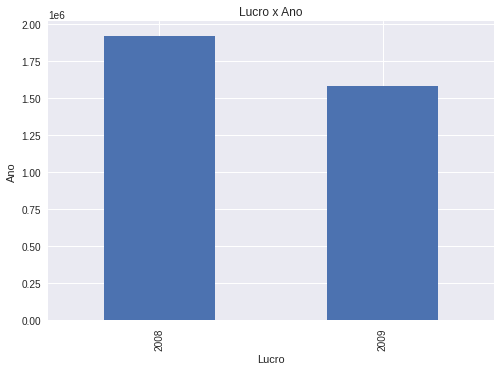

In [69]:
#Grafico com o lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Lucro')
plt.ylabel('Ano');

In [70]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [74]:
#Seleciona somente as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [76]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo TT,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


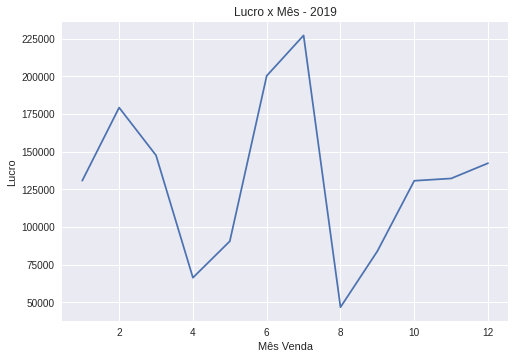

In [83]:
#Exibe o lucro por mês de 2009 em um gráfico de linha
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mês - 2019')
plt.xlabel('Mês Venda')
plt.ylabel('Lucro');


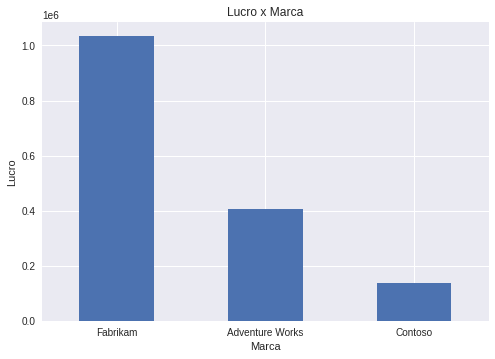

In [91]:
#Exibe o lucro por marca
df_2009.groupby(df_2009['Marca'])['Lucro'].sum().sort_values(ascending=False).plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

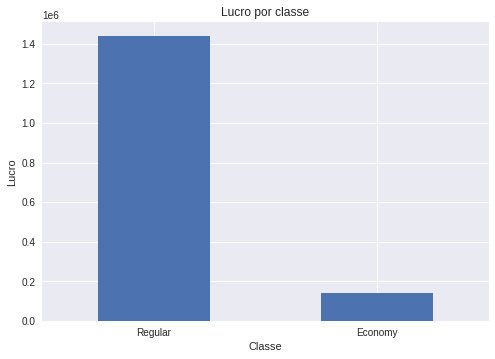

In [97]:
#Exibe o lucro por classe
df_2009.groupby(df_2009['Classe'])['Lucro'].sum().sort_values(ascending=False).plot.bar(title='Lucro por classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');


In [100]:
#Exibe análise sobre o tempo de envio
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

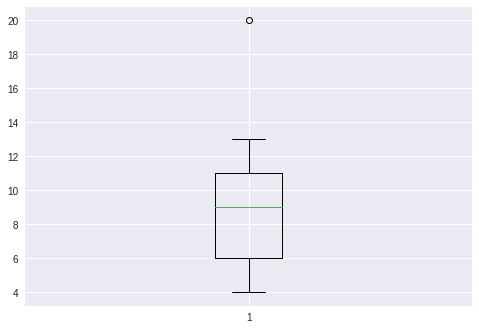

In [102]:
#Exibe gráfico tipo boxplot
plt.boxplot(df['Tempo Envio']);

In [106]:
#Exite o outlier que apareceu no boxplot
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo TT,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


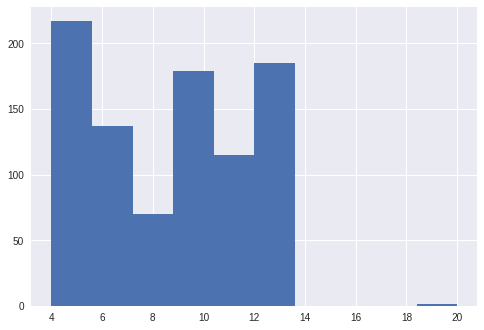

In [104]:
#Exibe gráfico tipo histograma
plt.hist(df['Tempo Envio']);

In [108]:
#Exportar o df
df.to_csv('df_vendas_novo.csv', index=False)